In [2]:
from konlpy.tag import Mecab

mecab = Mecab()
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [3]:
import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/ratings.txt'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 200001
Example:
>> id	document	label
>> 9468781	어?생각없이 봤는데 상당한 수작.일본영화 10년내 최고로 마음에 들었다.강렬한 임팩트가 일품.	1
>> 6809191	마치 바다속 , 아쿠아리움속으로 들어간듯한 느낌의 영화 어린자녀들에게 강추!!	1
>> 8255656	재밌습니다.재밌습니다.	1
>> 8499726	너무너무재밌게보고있어요! 중간부터 본방사수했지만 스토리가 탄탄하고 흥미진진해서 1화부터 다찾아서 봤네요 배우들 연기도 어디하나빠지는데가없네요 요새는 수백향만챙겨봐요	1


문장의 최단 길이: 8
문장의 최장 길이: 156
문장의 평균 길이: 45


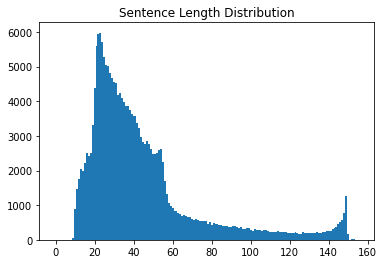

In [4]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [5]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

In [6]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 13
Outlier Index: 14
Outlier Index: 15
Outlier Index: 16
Outlier Index: 17
Outlier Index: 18
Outlier Index: 19
Outlier Index: 20
Outlier Index: 21
Outlier Index: 22
Outlier Index: 23
Outlier Index: 24
Outlier Index: 25
Outlier Index: 26
Outlier Index: 27
Outlier Index: 28
Outlier Index: 29
Outlier Index: 30
Outlier Index: 31
Outlier Index: 32
Outlier Index: 33
Outlier Index: 34
Outlier Index: 35
Outlier Index: 36
Outlier Index: 37
Outlier Index: 38
Outlier Index: 39
Outlier Index: 40
Outlier Index: 41
Outlier Index: 42
Outlier Index: 43
Outlier Index: 44
Outlier Index: 45
Outlier Index: 46
Outlier Index: 47
Outlier Index: 48
Outlier Index: 49
Outlier Index: 50
Outlier Index: 51
Outlier Index: 52
Outlier Index: 53
Outlier Index: 54
Outlier Index: 55
Outlier Index: 56
Outlier Index: 57


In [7]:
check_sentence_with_length(raw, 11)

7477618	굿	1
5458245	핡	1
3946738	굿	1
7910238	휴	1
6924850	굿	1
7804013	ㅋ	1
5666738	ㅇ	1
3003689	굿	1
7830757	‥	1
6876426	O	1
773168	수작	1
3867260	굿	1
7250157	굿	1
7403577	갑	1
7505484	ㅎ	1
7483267	굿	1
7281794	.	1
117697	맞아	1
7225800	올	1
7721830	굿	1
7684134	헷	1
971290	명작	1
1426659	g	1
8012399	굿	1
261233	오우	1
7499560	♥	1
7764304	.	1
4483055	짱	1
4321484	짱	1
7317454	ㅆ	1
7863935	.	1
7723058	굿	1
7125585	짱	1
6813098	굿	1
7236009	.	1
4746939	굿	1
6297864	굿	1
7523848	굿	1
100226	gg	1
7083655	.	1
3891011	짱	1
7489303	굳	1
7436370	굿	1
5967897	잼	1
7903489	굿	1
3339077	짱	1
283968	후훗	1
3774728	굿	1
3382434	굿	1
7927389	ㅎ	1
6556188	굿	1
150372	나두	1
7677681	굿	1
1815836	굿	1
5277532	ㅁ	1
632718	^^	1
7264736	굳	1
6365131	굿	1
5978698	굿	1
6959675	?	1
7863562	ㅎ	1
3945553	굿	1
4319568	굿	1
7221937	.	1
7945393	짱	1
4493033	ㅇ	1
7330348	ㅋ	1
4016750	애	1
7143066	ㅋ	1
1447283	굿	1
7338439	?	1
79940	^-^	1
7284441	짱	1
7734153	.	1
7104728	흠	1
1403313	굿	1
7474858	ㅋ	1
7533249	찜	1
565434	조앙	1
453949	멋져	1
6898989	b	1
7516020	굿	1
6805929	굳	1
7172

Data Size: 200001
문장의 최단 길이: 8
문장의 최장 길이: 156
문장의 평균 길이: 45


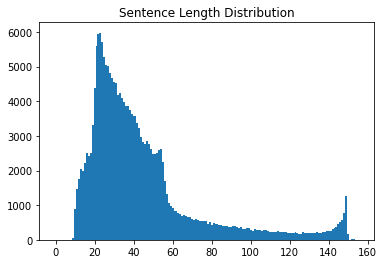

In [8]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

Data Size: 200001
문장의 최단 길이: 8
문장의 최장 길이: 156
문장의 평균 길이: 45


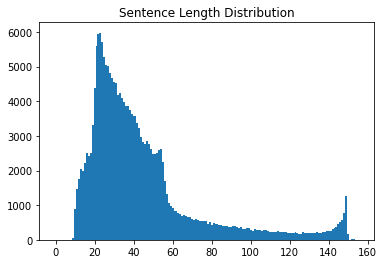

In [9]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

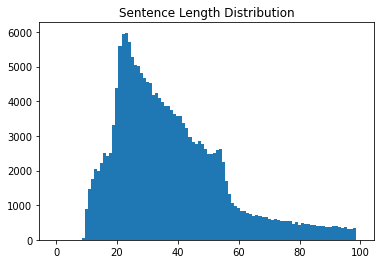

In [10]:
max_len = 100
min_len = 5

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [11]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [12]:
split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())

In [13]:
split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 538133


In [14]:
#단어사전 확인
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 1
1 : 0
2 : 영화
3 : 너무
4 : 정말
5 : 진짜
6 : 이
7 : 영화.
8 : 왜
9 : 이런
10 : 그냥
11 : 더


In [15]:
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [16]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)
print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 238594


In [17]:
import sentencepiece as spm
import os

temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)

!ls -l korean_spm*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id

-rw-r--r-- 1 root root 368450 Feb 22 07:19 korean_spm.model
-rw-r--r-- 1 root root 137855 Feb 22 07:19 korean_spm.vocab


In [18]:

s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))


[2647, 14, 357, 22, 2358, 14, 131, 23, 6]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


In [20]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [21]:
my_corpus = ['안녕하세요', '안녕 안녕 하세요']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[  55 4653 3094    0    0    0]
 [  55 4653   55 4653    4 3094]]
